# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

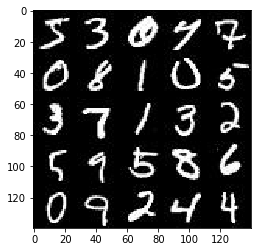

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

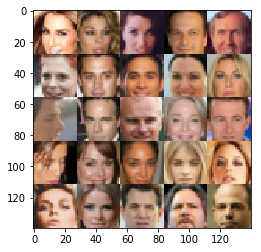

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/adi/anaconda/envs/facegen/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_input = tf.placeholder(tf.float32, (None, image_height, image_width, image_channels))
    z_data = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)
    return real_input, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
discOutHeight = 7
discOutWidth = 7
discOutDepth = 256
discOutSize = discOutHeight*discOutWidth*discOutDepth

# images size 28x28x3
# transformation to 28x28x64
filter_1 = 64
kernel_size_1 = 5
stride_1 = 1

# transformation to 14x14x128
filter_2 = 128
kernel_size_2 = 5
stride_2 = 2

# transformation to 7x7x256
filter_3 = 256
kernel_size_3 = 5
stride_3 = 2



In [7]:
def discriminator(images, reuse=False, alpha = 0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    stddev=0.02
    kernel_initializer = tf.random_normal_initializer(stddev=stddev)
    
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, filter_1, kernel_size_1, strides=stride_1, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
        
        x1 = tf.layers.conv2d(x1, filter_2, kernel_size_2, strides=stride_2, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(alpha * x1, x1)
        
        x1 = tf.layers.conv2d(x1, filter_3, kernel_size_3, strides=stride_3, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(alpha * x1, x1)
        
        # Flatten it
        flat = tf.reshape(x1, (-1, discOutSize))
        
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, discOutSize)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, discOutHeight, discOutWidth, discOutDepth))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256
        
        x1 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 14x14x128
        
        x1 = tf.layers.conv2d_transpose(x1, 64, 5, strides=2, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 28x28x64
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x1, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x5
        
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [12]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    #smooth = 0.1
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [13]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [ ]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    print_every = 1
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)
                    
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 2.9438... Generator Loss: 11.3415
Epoch 0/2... Discriminator Loss: 1.4779... Generator Loss: 13.2149
Epoch 0/2... Discriminator Loss: 5.5732... Generator Loss: 0.0936
Epoch 0/2... Discriminator Loss: 0.4940... Generator Loss: 2.9315
Epoch 0/2... Discriminator Loss: 0.4522... Generator Loss: 1.6961
Epoch 0/2... Discriminator Loss: 0.8558... Generator Loss: 1.0268
Epoch 0/2... Discriminator Loss: 2.0994... Generator Loss: 0.2163
Epoch 0/2... Discriminator Loss: 0.3649... Generator Loss: 3.1079
Epoch 0/2... Discriminator Loss: 0.3292... Generator Loss: 1.8780


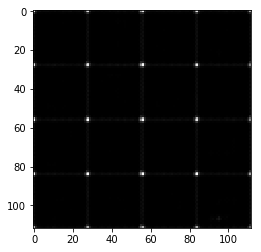

Epoch 0/2... Discriminator Loss: 0.4434... Generator Loss: 1.3684
Epoch 0/2... Discriminator Loss: 0.1587... Generator Loss: 2.3383
Epoch 0/2... Discriminator Loss: 0.1091... Generator Loss: 2.9632
Epoch 0/2... Discriminator Loss: 0.0400... Generator Loss: 3.7817
Epoch 0/2... Discriminator Loss: 0.0492... Generator Loss: 3.5561
Epoch 0/2... Discriminator Loss: 0.0189... Generator Loss: 5.0607
Epoch 0/2... Discriminator Loss: 0.0210... Generator Loss: 4.6207
Epoch 0/2... Discriminator Loss: 0.4185... Generator Loss: 1.3000
Epoch 0/2... Discriminator Loss: 0.6274... Generator Loss: 2.4492
Epoch 0/2... Discriminator Loss: 0.2374... Generator Loss: 2.3211


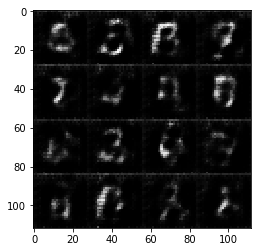

Epoch 0/2... Discriminator Loss: 0.1427... Generator Loss: 2.7783
Epoch 0/2... Discriminator Loss: 0.6976... Generator Loss: 1.4094
Epoch 0/2... Discriminator Loss: 0.3113... Generator Loss: 2.4931
Epoch 0/2... Discriminator Loss: 0.1166... Generator Loss: 5.7019
Epoch 0/2... Discriminator Loss: 0.0714... Generator Loss: 3.1702
Epoch 0/2... Discriminator Loss: 6.7030... Generator Loss: 14.3996
Epoch 0/2... Discriminator Loss: 0.1862... Generator Loss: 3.3031
Epoch 0/2... Discriminator Loss: 0.1035... Generator Loss: 2.6474
Epoch 0/2... Discriminator Loss: 0.6432... Generator Loss: 1.1172
Epoch 0/2... Discriminator Loss: 1.3401... Generator Loss: 0.4475


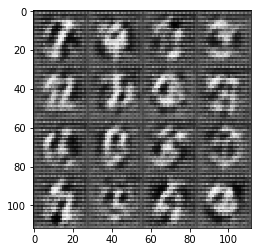

Epoch 0/2... Discriminator Loss: 0.1774... Generator Loss: 2.5912
Epoch 0/2... Discriminator Loss: 1.2999... Generator Loss: 3.8960
Epoch 0/2... Discriminator Loss: 0.9364... Generator Loss: 0.6721
Epoch 0/2... Discriminator Loss: 0.0493... Generator Loss: 4.1391
Epoch 0/2... Discriminator Loss: 0.4280... Generator Loss: 1.7240
Epoch 0/2... Discriminator Loss: 0.1088... Generator Loss: 4.2909
Epoch 0/2... Discriminator Loss: 0.0346... Generator Loss: 5.5723
Epoch 0/2... Discriminator Loss: 0.0234... Generator Loss: 5.9938
Epoch 0/2... Discriminator Loss: 0.0146... Generator Loss: 6.2399
Epoch 0/2... Discriminator Loss: 0.0386... Generator Loss: 4.5101


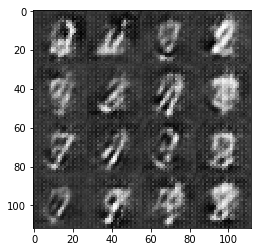

Epoch 0/2... Discriminator Loss: 0.0583... Generator Loss: 3.3811
Epoch 0/2... Discriminator Loss: 0.2027... Generator Loss: 14.4451
Epoch 0/2... Discriminator Loss: 1.1808... Generator Loss: 0.5290
Epoch 0/2... Discriminator Loss: 0.5389... Generator Loss: 1.7469
Epoch 0/2... Discriminator Loss: 0.4478... Generator Loss: 1.8673
Epoch 0/2... Discriminator Loss: 0.2935... Generator Loss: 2.0204
Epoch 0/2... Discriminator Loss: 0.2550... Generator Loss: 2.2224
Epoch 0/2... Discriminator Loss: 0.4098... Generator Loss: 1.7836
Epoch 0/2... Discriminator Loss: 0.3401... Generator Loss: 1.7071
Epoch 0/2... Discriminator Loss: 0.1398... Generator Loss: 2.8638


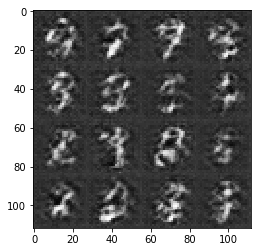

Epoch 0/2... Discriminator Loss: 0.2018... Generator Loss: 2.0040
Epoch 0/2... Discriminator Loss: 0.0915... Generator Loss: 2.8970
Epoch 0/2... Discriminator Loss: 0.0999... Generator Loss: 3.0551
Epoch 0/2... Discriminator Loss: 0.0154... Generator Loss: 4.8982
Epoch 0/2... Discriminator Loss: 0.0326... Generator Loss: 4.0766
Epoch 0/2... Discriminator Loss: 1.3834... Generator Loss: 0.6147
Epoch 0/2... Discriminator Loss: 0.4470... Generator Loss: 1.7360
Epoch 0/2... Discriminator Loss: 0.6204... Generator Loss: 1.0067
Epoch 0/2... Discriminator Loss: 0.0753... Generator Loss: 3.4121
Epoch 0/2... Discriminator Loss: 0.1162... Generator Loss: 2.7043


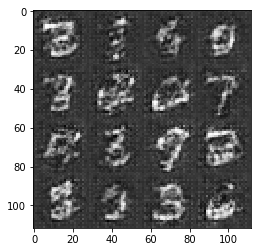

Epoch 0/2... Discriminator Loss: 0.0714... Generator Loss: 3.1674
Epoch 0/2... Discriminator Loss: 0.0645... Generator Loss: 3.2269
Epoch 0/2... Discriminator Loss: 0.0132... Generator Loss: 5.7223
Epoch 0/2... Discriminator Loss: 1.2068... Generator Loss: 0.5896
Epoch 0/2... Discriminator Loss: 0.2797... Generator Loss: 2.0885
Epoch 0/2... Discriminator Loss: 0.1415... Generator Loss: 3.1252
Epoch 0/2... Discriminator Loss: 0.4341... Generator Loss: 1.3347
Epoch 0/2... Discriminator Loss: 0.1125... Generator Loss: 2.7960
Epoch 0/2... Discriminator Loss: 0.3924... Generator Loss: 1.3261
Epoch 0/2... Discriminator Loss: 0.9585... Generator Loss: 1.8789


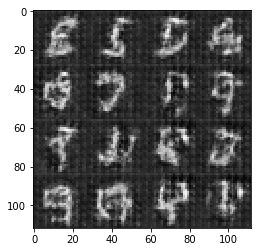

Epoch 0/2... Discriminator Loss: 0.9173... Generator Loss: 0.8655
Epoch 0/2... Discriminator Loss: 0.9035... Generator Loss: 1.0133
Epoch 0/2... Discriminator Loss: 1.2434... Generator Loss: 0.6186
Epoch 0/2... Discriminator Loss: 1.6467... Generator Loss: 0.3292
Epoch 0/2... Discriminator Loss: 0.5337... Generator Loss: 1.2549
Epoch 0/2... Discriminator Loss: 0.6793... Generator Loss: 0.9176
Epoch 0/2... Discriminator Loss: 0.6022... Generator Loss: 0.9634
Epoch 0/2... Discriminator Loss: 0.5954... Generator Loss: 3.1642
Epoch 0/2... Discriminator Loss: 0.3288... Generator Loss: 1.9230
Epoch 0/2... Discriminator Loss: 0.2933... Generator Loss: 1.7894


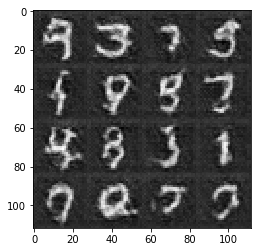

Epoch 0/2... Discriminator Loss: 0.6203... Generator Loss: 1.0824
Epoch 0/2... Discriminator Loss: 0.4442... Generator Loss: 1.3244
Epoch 0/2... Discriminator Loss: 0.3153... Generator Loss: 4.2849
Epoch 0/2... Discriminator Loss: 0.1443... Generator Loss: 2.6325
Epoch 0/2... Discriminator Loss: 0.1188... Generator Loss: 2.5615
Epoch 0/2... Discriminator Loss: 0.0470... Generator Loss: 3.7848
Epoch 0/2... Discriminator Loss: 0.7046... Generator Loss: 1.2905
Epoch 0/2... Discriminator Loss: 0.6229... Generator Loss: 1.7279
Epoch 0/2... Discriminator Loss: 0.5711... Generator Loss: 3.9614
Epoch 0/2... Discriminator Loss: 0.7406... Generator Loss: 1.0462


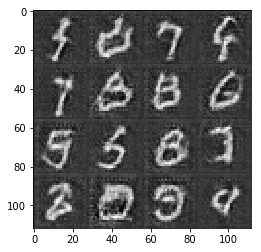

Epoch 0/2... Discriminator Loss: 0.4308... Generator Loss: 1.5712
Epoch 0/2... Discriminator Loss: 0.5474... Generator Loss: 1.1477
Epoch 0/2... Discriminator Loss: 0.6147... Generator Loss: 1.0749
Epoch 0/2... Discriminator Loss: 0.2535... Generator Loss: 2.2420
Epoch 1/2... Discriminator Loss: 0.1744... Generator Loss: 2.3875
Epoch 1/2... Discriminator Loss: 0.1851... Generator Loss: 2.2354
Epoch 1/2... Discriminator Loss: 0.0439... Generator Loss: 3.9760
Epoch 1/2... Discriminator Loss: 0.0724... Generator Loss: 3.6952
Epoch 1/2... Discriminator Loss: 0.2121... Generator Loss: 1.9695
Epoch 1/2... Discriminator Loss: 0.6485... Generator Loss: 0.9132


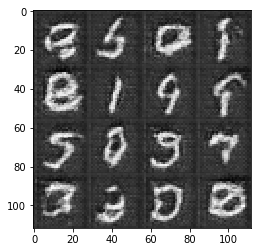

Epoch 1/2... Discriminator Loss: 0.4026... Generator Loss: 1.6718
Epoch 1/2... Discriminator Loss: 0.4427... Generator Loss: 1.3291
Epoch 1/2... Discriminator Loss: 0.0514... Generator Loss: 4.3490
Epoch 1/2... Discriminator Loss: 0.2087... Generator Loss: 2.2252
Epoch 1/2... Discriminator Loss: 0.5263... Generator Loss: 8.6222
Epoch 1/2... Discriminator Loss: 0.7585... Generator Loss: 0.9985
Epoch 1/2... Discriminator Loss: 0.6853... Generator Loss: 1.3614
Epoch 1/2... Discriminator Loss: 0.8828... Generator Loss: 0.8208
Epoch 1/2... Discriminator Loss: 1.1009... Generator Loss: 0.5374
Epoch 1/2... Discriminator Loss: 0.9577... Generator Loss: 0.6266


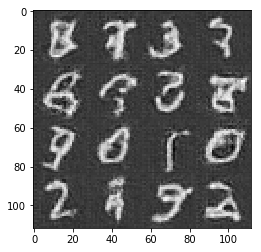

Epoch 1/2... Discriminator Loss: 1.3550... Generator Loss: 0.3925
Epoch 1/2... Discriminator Loss: 0.1939... Generator Loss: 2.4383
Epoch 1/2... Discriminator Loss: 0.2806... Generator Loss: 3.3985
Epoch 1/2... Discriminator Loss: 0.1578... Generator Loss: 2.3633
Epoch 1/2... Discriminator Loss: 0.0756... Generator Loss: 3.3131
Epoch 1/2... Discriminator Loss: 0.2770... Generator Loss: 1.7728
Epoch 1/2... Discriminator Loss: 0.0912... Generator Loss: 3.5431
Epoch 1/2... Discriminator Loss: 0.3461... Generator Loss: 1.5351
Epoch 1/2... Discriminator Loss: 0.0888... Generator Loss: 7.4703
Epoch 1/2... Discriminator Loss: 0.0057... Generator Loss: 6.5658


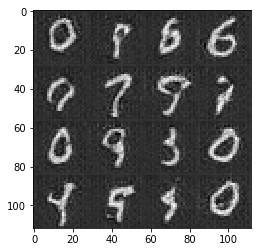

Epoch 1/2... Discriminator Loss: 0.1519... Generator Loss: 2.4018
Epoch 1/2... Discriminator Loss: 3.6655... Generator Loss: 0.0399
Epoch 1/2... Discriminator Loss: 0.5592... Generator Loss: 2.2326
Epoch 1/2... Discriminator Loss: 0.8248... Generator Loss: 0.7634
Epoch 1/2... Discriminator Loss: 0.3542... Generator Loss: 1.6440
Epoch 1/2... Discriminator Loss: 0.9264... Generator Loss: 4.9078
Epoch 1/2... Discriminator Loss: 0.3995... Generator Loss: 1.3795
Epoch 1/2... Discriminator Loss: 0.9506... Generator Loss: 0.7047
Epoch 1/2... Discriminator Loss: 0.0347... Generator Loss: 6.4010
Epoch 1/2... Discriminator Loss: 0.3324... Generator Loss: 1.6120


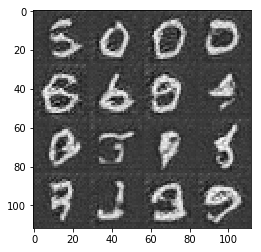

Epoch 1/2... Discriminator Loss: 0.0808... Generator Loss: 2.9963
Epoch 1/2... Discriminator Loss: 0.0143... Generator Loss: 5.5014
Epoch 1/2... Discriminator Loss: 0.3386... Generator Loss: 1.6090
Epoch 1/2... Discriminator Loss: 0.1410... Generator Loss: 2.4086
Epoch 1/2... Discriminator Loss: 0.0041... Generator Loss: 9.6509
Epoch 1/2... Discriminator Loss: 0.0044... Generator Loss: 9.3037
Epoch 1/2... Discriminator Loss: 0.0269... Generator Loss: 4.6270
Epoch 1/2... Discriminator Loss: 0.0109... Generator Loss: 5.6991
Epoch 1/2... Discriminator Loss: 0.0461... Generator Loss: 3.7805
Epoch 1/2... Discriminator Loss: 0.0058... Generator Loss: 9.1223


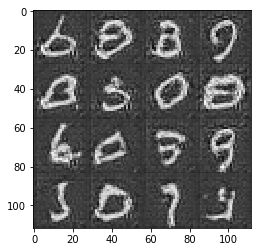

Epoch 1/2... Discriminator Loss: 0.0159... Generator Loss: 8.6366
Epoch 1/2... Discriminator Loss: 0.0587... Generator Loss: 3.2829
Epoch 1/2... Discriminator Loss: 0.3754... Generator Loss: 1.5377
Epoch 1/2... Discriminator Loss: 0.0106... Generator Loss: 6.5295
Epoch 1/2... Discriminator Loss: 0.0204... Generator Loss: 4.4277
Epoch 1/2... Discriminator Loss: 0.0179... Generator Loss: 5.8033
Epoch 1/2... Discriminator Loss: 3.0766... Generator Loss: 0.1776
Epoch 1/2... Discriminator Loss: 0.5939... Generator Loss: 1.2007
Epoch 1/2... Discriminator Loss: 0.6064... Generator Loss: 1.7045
Epoch 1/2... Discriminator Loss: 0.4606... Generator Loss: 2.0056


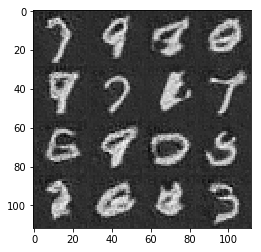

Epoch 1/2... Discriminator Loss: 0.3342... Generator Loss: 1.7556
Epoch 1/2... Discriminator Loss: 0.3997... Generator Loss: 1.5562
Epoch 1/2... Discriminator Loss: 0.2939... Generator Loss: 2.0046
Epoch 1/2... Discriminator Loss: 0.1345... Generator Loss: 2.8649
Epoch 1/2... Discriminator Loss: 1.0524... Generator Loss: 0.9866
Epoch 1/2... Discriminator Loss: 0.5454... Generator Loss: 1.4638
Epoch 1/2... Discriminator Loss: 0.4563... Generator Loss: 2.4940
Epoch 1/2... Discriminator Loss: 0.5248... Generator Loss: 1.2173
Epoch 1/2... Discriminator Loss: 0.4917... Generator Loss: 1.2864
Epoch 1/2... Discriminator Loss: 0.8965... Generator Loss: 0.8015


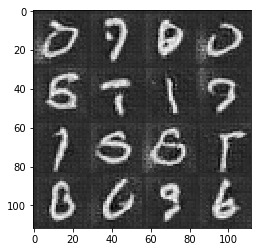

Epoch 1/2... Discriminator Loss: 0.0410... Generator Loss: 5.1387
Epoch 1/2... Discriminator Loss: 0.0173... Generator Loss: 5.7145
Epoch 1/2... Discriminator Loss: 0.0051... Generator Loss: 6.0642
Epoch 1/2... Discriminator Loss: 1.2662... Generator Loss: 4.4537
Epoch 1/2... Discriminator Loss: 0.7736... Generator Loss: 2.8947
Epoch 1/2... Discriminator Loss: 0.5890... Generator Loss: 1.7053
Epoch 1/2... Discriminator Loss: 0.3636... Generator Loss: 1.9662
Epoch 1/2... Discriminator Loss: 0.3164... Generator Loss: 2.0571
Epoch 1/2... Discriminator Loss: 1.0656... Generator Loss: 0.6005
Epoch 1/2... Discriminator Loss: 0.2219... Generator Loss: 2.2032


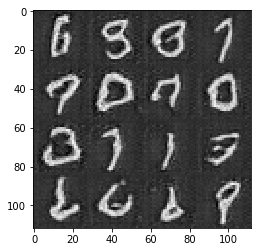

Epoch 1/2... Discriminator Loss: 0.0817... Generator Loss: 3.4130
Epoch 1/2... Discriminator Loss: 2.6943... Generator Loss: 0.1820
Epoch 1/2... Discriminator Loss: 1.3091... Generator Loss: 0.4794
Epoch 1/2... Discriminator Loss: 0.5140... Generator Loss: 1.5379
Epoch 1/2... Discriminator Loss: 0.3529... Generator Loss: 2.4901
Epoch 1/2... Discriminator Loss: 1.0166... Generator Loss: 5.0349
Epoch 1/2... Discriminator Loss: 0.4343... Generator Loss: 1.4608
Epoch 1/2... Discriminator Loss: 0.3170... Generator Loss: 2.0839
Epoch 1/2... Discriminator Loss: 0.3600... Generator Loss: 1.7903
Epoch 1/2... Discriminator Loss: 0.1717... Generator Loss: 2.3871


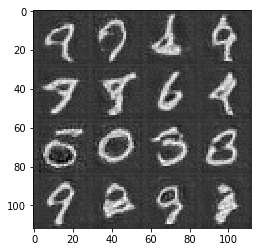

Epoch 1/2... Discriminator Loss: 0.9030... Generator Loss: 0.9118
Epoch 1/2... Discriminator Loss: 0.5622... Generator Loss: 1.6790
Epoch 1/2... Discriminator Loss: 0.5822... Generator Loss: 2.1723
Epoch 1/2... Discriminator Loss: 0.4772... Generator Loss: 1.3994
Epoch 1/2... Discriminator Loss: 2.0552... Generator Loss: 0.1947
Epoch 1/2... Discriminator Loss: 0.2736... Generator Loss: 3.5904
Epoch 1/2... Discriminator Loss: 1.3681... Generator Loss: 3.2883
Epoch 1/2... Discriminator Loss: 0.6070... Generator Loss: 1.1502


In [19]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 0.2237... Generator Loss: 6.0746
Epoch 0/1... Discriminator Loss: 0.0873... Generator Loss: 3.4115
Epoch 0/1... Discriminator Loss: 2.2931... Generator Loss: 16.6796
Epoch 0/1... Discriminator Loss: 0.6785... Generator Loss: 1.9793
Epoch 0/1... Discriminator Loss: 0.2562... Generator Loss: 3.8485
Epoch 0/1... Discriminator Loss: 0.1754... Generator Loss: 2.8694
Epoch 0/1... Discriminator Loss: 1.5528... Generator Loss: 0.8430
Epoch 0/1... Discriminator Loss: 1.0904... Generator Loss: 1.0423
Epoch 0/1... Discriminator Loss: 0.0468... Generator Loss: 4.1814


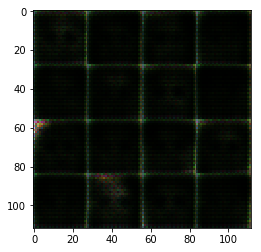

Epoch 0/1... Discriminator Loss: 0.0307... Generator Loss: 5.2319
Epoch 0/1... Discriminator Loss: 0.0132... Generator Loss: 8.5365
Epoch 0/1... Discriminator Loss: 1.7294... Generator Loss: 1.3751
Epoch 0/1... Discriminator Loss: 0.0547... Generator Loss: 4.3113
Epoch 0/1... Discriminator Loss: 0.0470... Generator Loss: 4.4476
Epoch 0/1... Discriminator Loss: 0.4872... Generator Loss: 1.7072
Epoch 0/1... Discriminator Loss: 0.0951... Generator Loss: 3.1639
Epoch 0/1... Discriminator Loss: 0.7448... Generator Loss: 1.0828
Epoch 0/1... Discriminator Loss: 0.3380... Generator Loss: 1.7650
Epoch 0/1... Discriminator Loss: 0.0422... Generator Loss: 3.4769


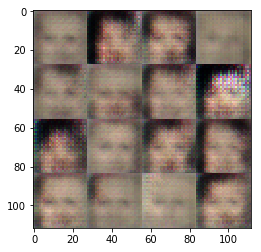

Epoch 0/1... Discriminator Loss: 0.5941... Generator Loss: 1.0304
Epoch 0/1... Discriminator Loss: 0.7096... Generator Loss: 1.3399
Epoch 0/1... Discriminator Loss: 0.9396... Generator Loss: 1.0254
Epoch 0/1... Discriminator Loss: 0.5163... Generator Loss: 1.6783
Epoch 0/1... Discriminator Loss: 0.4947... Generator Loss: 1.4933
Epoch 0/1... Discriminator Loss: 0.1421... Generator Loss: 2.8613
Epoch 0/1... Discriminator Loss: 0.7896... Generator Loss: 0.7362
Epoch 0/1... Discriminator Loss: 0.1261... Generator Loss: 3.3343
Epoch 0/1... Discriminator Loss: 0.0341... Generator Loss: 6.3037
Epoch 0/1... Discriminator Loss: 0.3157... Generator Loss: 2.0195


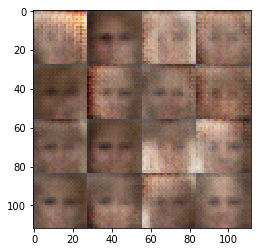

Epoch 0/1... Discriminator Loss: 0.1839... Generator Loss: 3.2360
Epoch 0/1... Discriminator Loss: 0.0810... Generator Loss: 3.3449
Epoch 0/1... Discriminator Loss: 0.1057... Generator Loss: 7.2406
Epoch 0/1... Discriminator Loss: 1.3230... Generator Loss: 0.4484
Epoch 0/1... Discriminator Loss: 0.0153... Generator Loss: 11.1701
Epoch 0/1... Discriminator Loss: 0.0028... Generator Loss: 7.1415
Epoch 0/1... Discriminator Loss: 1.3176... Generator Loss: 2.2159
Epoch 0/1... Discriminator Loss: 0.1275... Generator Loss: 2.9931
Epoch 0/1... Discriminator Loss: 0.1603... Generator Loss: 2.3000
Epoch 0/1... Discriminator Loss: 0.4390... Generator Loss: 6.1706


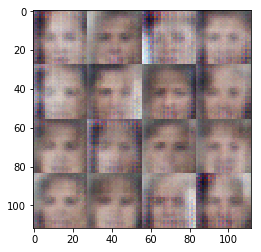

Epoch 0/1... Discriminator Loss: 1.5640... Generator Loss: 7.7862
Epoch 0/1... Discriminator Loss: 0.0670... Generator Loss: 9.2217
Epoch 0/1... Discriminator Loss: 0.7999... Generator Loss: 1.7076
Epoch 0/1... Discriminator Loss: 0.0658... Generator Loss: 3.6673
Epoch 0/1... Discriminator Loss: 0.0975... Generator Loss: 4.4666
Epoch 0/1... Discriminator Loss: 0.0159... Generator Loss: 5.1494
Epoch 0/1... Discriminator Loss: 0.1655... Generator Loss: 4.9631
Epoch 0/1... Discriminator Loss: 1.0948... Generator Loss: 0.9057
Epoch 0/1... Discriminator Loss: 5.3178... Generator Loss: 0.0117
Epoch 0/1... Discriminator Loss: 1.1488... Generator Loss: 0.8718


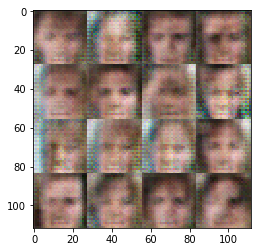

Epoch 0/1... Discriminator Loss: 0.6732... Generator Loss: 1.8002
Epoch 0/1... Discriminator Loss: 0.4522... Generator Loss: 1.3905
Epoch 0/1... Discriminator Loss: 2.3713... Generator Loss: 7.3683
Epoch 0/1... Discriminator Loss: 0.2860... Generator Loss: 2.0522
Epoch 0/1... Discriminator Loss: 0.3668... Generator Loss: 1.4054
Epoch 0/1... Discriminator Loss: 1.1249... Generator Loss: 0.5618
Epoch 0/1... Discriminator Loss: 1.1655... Generator Loss: 3.6913
Epoch 0/1... Discriminator Loss: 0.7665... Generator Loss: 4.0175
Epoch 0/1... Discriminator Loss: 0.0497... Generator Loss: 5.1138
Epoch 0/1... Discriminator Loss: 0.0221... Generator Loss: 6.1553


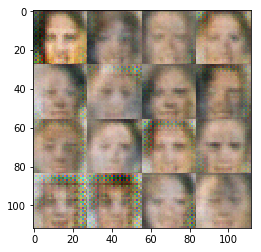

Epoch 0/1... Discriminator Loss: 0.0150... Generator Loss: 4.7168
Epoch 0/1... Discriminator Loss: 0.0670... Generator Loss: 5.1223
Epoch 0/1... Discriminator Loss: 0.1345... Generator Loss: 4.2953
Epoch 0/1... Discriminator Loss: 0.0800... Generator Loss: 3.2707
Epoch 0/1... Discriminator Loss: 0.0257... Generator Loss: 8.3071
Epoch 0/1... Discriminator Loss: 1.5532... Generator Loss: 2.6283
Epoch 0/1... Discriminator Loss: 1.3129... Generator Loss: 0.4137
Epoch 0/1... Discriminator Loss: 0.0270... Generator Loss: 4.2575
Epoch 0/1... Discriminator Loss: 0.2327... Generator Loss: 1.9258
Epoch 0/1... Discriminator Loss: 0.0119... Generator Loss: 6.3053


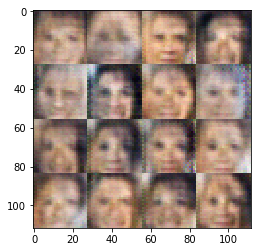

Epoch 0/1... Discriminator Loss: 0.3617... Generator Loss: 1.4128
Epoch 0/1... Discriminator Loss: 0.0549... Generator Loss: 8.1979
Epoch 0/1... Discriminator Loss: 0.3473... Generator Loss: 1.6211
Epoch 0/1... Discriminator Loss: 0.2023... Generator Loss: 2.5211
Epoch 0/1... Discriminator Loss: 1.0493... Generator Loss: 0.7756
Epoch 0/1... Discriminator Loss: 0.5243... Generator Loss: 6.3631
Epoch 0/1... Discriminator Loss: 0.0227... Generator Loss: 4.9703
Epoch 0/1... Discriminator Loss: 0.1481... Generator Loss: 2.5588
Epoch 0/1... Discriminator Loss: 0.6848... Generator Loss: 0.9332
Epoch 0/1... Discriminator Loss: 0.0335... Generator Loss: 6.1789


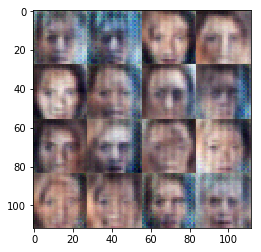

Epoch 0/1... Discriminator Loss: 0.0450... Generator Loss: 3.7755
Epoch 0/1... Discriminator Loss: 0.1589... Generator Loss: 2.4994
Epoch 0/1... Discriminator Loss: 0.0165... Generator Loss: 4.6011
Epoch 0/1... Discriminator Loss: 0.0915... Generator Loss: 3.0057
Epoch 0/1... Discriminator Loss: 0.0071... Generator Loss: 6.4093
Epoch 0/1... Discriminator Loss: 0.0097... Generator Loss: 5.9883
Epoch 0/1... Discriminator Loss: 0.0029... Generator Loss: 9.8258
Epoch 0/1... Discriminator Loss: 0.0042... Generator Loss: 6.8484
Epoch 0/1... Discriminator Loss: 0.0057... Generator Loss: 8.6079
Epoch 0/1... Discriminator Loss: 0.0039... Generator Loss: 8.5663


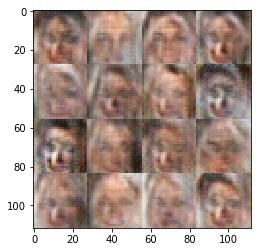

Epoch 0/1... Discriminator Loss: 0.0043... Generator Loss: 7.0134
Epoch 0/1... Discriminator Loss: 0.0018... Generator Loss: 7.1137
Epoch 0/1... Discriminator Loss: 0.0042... Generator Loss: 6.8091
Epoch 0/1... Discriminator Loss: 0.0623... Generator Loss: 3.2266
Epoch 0/1... Discriminator Loss: 0.0016... Generator Loss: 8.0200
Epoch 0/1... Discriminator Loss: 0.0116... Generator Loss: 5.3087
Epoch 0/1... Discriminator Loss: 0.0056... Generator Loss: 6.0541
Epoch 0/1... Discriminator Loss: 0.0151... Generator Loss: 4.6184
Epoch 0/1... Discriminator Loss: 0.0128... Generator Loss: 4.5581
Epoch 0/1... Discriminator Loss: 0.0071... Generator Loss: 6.0712


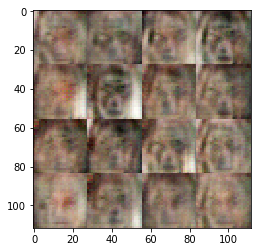

Epoch 0/1... Discriminator Loss: 0.0026... Generator Loss: 9.2897
Epoch 0/1... Discriminator Loss: 0.0079... Generator Loss: 5.4133
Epoch 0/1... Discriminator Loss: 0.0307... Generator Loss: 3.6926
Epoch 0/1... Discriminator Loss: 0.0105... Generator Loss: 4.9596
Epoch 0/1... Discriminator Loss: 0.0203... Generator Loss: 4.3317
Epoch 0/1... Discriminator Loss: 0.0287... Generator Loss: 3.9319
Epoch 0/1... Discriminator Loss: 0.0077... Generator Loss: 5.9301
Epoch 0/1... Discriminator Loss: 0.0176... Generator Loss: 4.9042
Epoch 0/1... Discriminator Loss: 0.0025... Generator Loss: 9.5061
Epoch 0/1... Discriminator Loss: 0.5008... Generator Loss: 2.6128


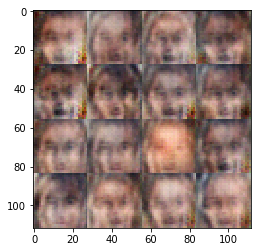

Epoch 0/1... Discriminator Loss: 1.9269... Generator Loss: 1.0759
Epoch 0/1... Discriminator Loss: 1.0245... Generator Loss: 1.2641
Epoch 0/1... Discriminator Loss: 0.0519... Generator Loss: 6.2045
Epoch 0/1... Discriminator Loss: 0.1555... Generator Loss: 2.7112
Epoch 0/1... Discriminator Loss: 0.4338... Generator Loss: 1.9964
Epoch 0/1... Discriminator Loss: 0.1710... Generator Loss: 2.8061
Epoch 0/1... Discriminator Loss: 4.6503... Generator Loss: 7.5985
Epoch 0/1... Discriminator Loss: 0.7743... Generator Loss: 1.0284
Epoch 0/1... Discriminator Loss: 1.6515... Generator Loss: 3.9055
Epoch 0/1... Discriminator Loss: 0.0559... Generator Loss: 4.4777


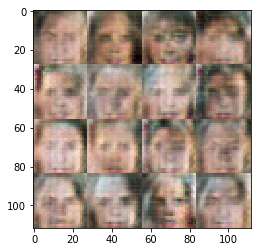

Epoch 0/1... Discriminator Loss: 0.1968... Generator Loss: 2.5773
Epoch 0/1... Discriminator Loss: 0.1651... Generator Loss: 3.7537
Epoch 0/1... Discriminator Loss: 0.3713... Generator Loss: 2.5887
Epoch 0/1... Discriminator Loss: 0.0590... Generator Loss: 4.3663
Epoch 0/1... Discriminator Loss: 0.0829... Generator Loss: 5.6980
Epoch 0/1... Discriminator Loss: 0.1539... Generator Loss: 3.3241
Epoch 0/1... Discriminator Loss: 0.1735... Generator Loss: 5.1701
Epoch 0/1... Discriminator Loss: 0.7663... Generator Loss: 1.4962
Epoch 0/1... Discriminator Loss: 0.6347... Generator Loss: 1.6112
Epoch 0/1... Discriminator Loss: 0.0657... Generator Loss: 5.2257


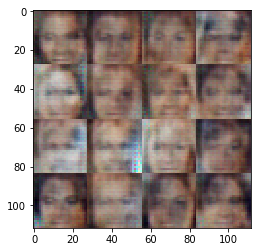

Epoch 0/1... Discriminator Loss: 0.0138... Generator Loss: 10.0532
Epoch 0/1... Discriminator Loss: 1.2999... Generator Loss: 8.5630
Epoch 0/1... Discriminator Loss: 0.1032... Generator Loss: 3.9966
Epoch 0/1... Discriminator Loss: 0.0966... Generator Loss: 5.6711
Epoch 0/1... Discriminator Loss: 0.0459... Generator Loss: 4.3146
Epoch 0/1... Discriminator Loss: 9.0526... Generator Loss: 8.9330
Epoch 0/1... Discriminator Loss: 0.5384... Generator Loss: 1.3585
Epoch 0/1... Discriminator Loss: 0.9931... Generator Loss: 1.1217
Epoch 0/1... Discriminator Loss: 0.6572... Generator Loss: 7.3270
Epoch 0/1... Discriminator Loss: 0.2283... Generator Loss: 2.2238


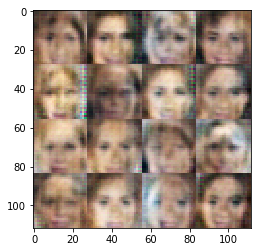

Epoch 0/1... Discriminator Loss: 0.9459... Generator Loss: 9.0419
Epoch 0/1... Discriminator Loss: 0.8994... Generator Loss: 1.0978
Epoch 0/1... Discriminator Loss: 1.6281... Generator Loss: 0.4180
Epoch 0/1... Discriminator Loss: 0.8320... Generator Loss: 0.9213
Epoch 0/1... Discriminator Loss: 0.0826... Generator Loss: 3.3606
Epoch 0/1... Discriminator Loss: 0.0462... Generator Loss: 4.1092
Epoch 0/1... Discriminator Loss: 0.9584... Generator Loss: 0.9346
Epoch 0/1... Discriminator Loss: 1.6577... Generator Loss: 0.4045
Epoch 0/1... Discriminator Loss: 0.4485... Generator Loss: 1.6731
Epoch 0/1... Discriminator Loss: 0.0466... Generator Loss: 4.7812


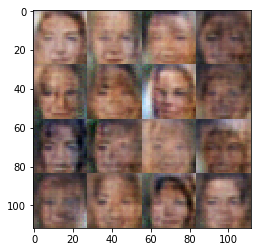

Epoch 0/1... Discriminator Loss: 1.4432... Generator Loss: 0.4649
Epoch 0/1... Discriminator Loss: 1.2563... Generator Loss: 0.6106
Epoch 0/1... Discriminator Loss: 0.0312... Generator Loss: 6.8725
Epoch 0/1... Discriminator Loss: 0.0649... Generator Loss: 3.3117
Epoch 0/1... Discriminator Loss: 0.0156... Generator Loss: 6.4337
Epoch 0/1... Discriminator Loss: 0.0080... Generator Loss: 8.0902
Epoch 0/1... Discriminator Loss: 0.0123... Generator Loss: 5.0238
Epoch 0/1... Discriminator Loss: 0.0540... Generator Loss: 4.0110
Epoch 0/1... Discriminator Loss: 0.0113... Generator Loss: 6.4295
Epoch 0/1... Discriminator Loss: 0.0042... Generator Loss: 7.8957


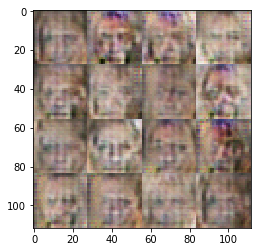

Epoch 0/1... Discriminator Loss: 0.0036... Generator Loss: 8.5521
Epoch 0/1... Discriminator Loss: 0.0963... Generator Loss: 3.3448
Epoch 0/1... Discriminator Loss: 0.0075... Generator Loss: 8.1826
Epoch 0/1... Discriminator Loss: 0.0017... Generator Loss: 9.0252
Epoch 0/1... Discriminator Loss: 0.0019... Generator Loss: 8.6751
Epoch 0/1... Discriminator Loss: 0.0112... Generator Loss: 5.2726
Epoch 0/1... Discriminator Loss: 0.0270... Generator Loss: 4.3882
Epoch 0/1... Discriminator Loss: 0.0019... Generator Loss: 7.6078
Epoch 0/1... Discriminator Loss: 0.0076... Generator Loss: 5.3646
Epoch 0/1... Discriminator Loss: 0.0025... Generator Loss: 8.5383


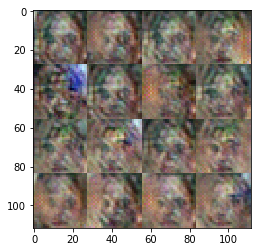

Epoch 0/1... Discriminator Loss: 0.0143... Generator Loss: 4.6562
Epoch 0/1... Discriminator Loss: 0.0102... Generator Loss: 8.7453
Epoch 0/1... Discriminator Loss: 0.0071... Generator Loss: 6.8953
Epoch 0/1... Discriminator Loss: 0.0511... Generator Loss: 4.1872
Epoch 0/1... Discriminator Loss: 0.8422... Generator Loss: 1.3269
Epoch 0/1... Discriminator Loss: 0.5138... Generator Loss: 1.5722
Epoch 0/1... Discriminator Loss: 0.5592... Generator Loss: 1.1833
Epoch 0/1... Discriminator Loss: 0.3992... Generator Loss: 2.2365
Epoch 0/1... Discriminator Loss: 0.1281... Generator Loss: 2.8800
Epoch 0/1... Discriminator Loss: 0.3416... Generator Loss: 2.8400


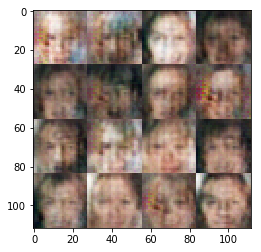

Epoch 0/1... Discriminator Loss: 0.0720... Generator Loss: 7.2104
Epoch 0/1... Discriminator Loss: 0.0141... Generator Loss: 5.8201
Epoch 0/1... Discriminator Loss: 0.4917... Generator Loss: 1.2971
Epoch 0/1... Discriminator Loss: 1.4717... Generator Loss: 0.4894
Epoch 0/1... Discriminator Loss: 1.2485... Generator Loss: 0.6626
Epoch 0/1... Discriminator Loss: 0.9192... Generator Loss: 1.8083
Epoch 0/1... Discriminator Loss: 1.0485... Generator Loss: 0.6812
Epoch 0/1... Discriminator Loss: 0.6491... Generator Loss: 1.1394
Epoch 0/1... Discriminator Loss: 0.6025... Generator Loss: 1.1350
Epoch 0/1... Discriminator Loss: 0.6555... Generator Loss: 1.6580


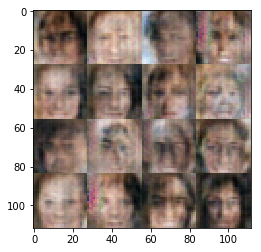

Epoch 0/1... Discriminator Loss: 1.6065... Generator Loss: 0.3628
Epoch 0/1... Discriminator Loss: 0.5644... Generator Loss: 1.1753
Epoch 0/1... Discriminator Loss: 0.2168... Generator Loss: 6.7968
Epoch 0/1... Discriminator Loss: 1.7651... Generator Loss: 3.3677
Epoch 0/1... Discriminator Loss: 0.1692... Generator Loss: 2.4742
Epoch 0/1... Discriminator Loss: 0.3045... Generator Loss: 2.0300
Epoch 0/1... Discriminator Loss: 0.0935... Generator Loss: 3.1923
Epoch 0/1... Discriminator Loss: 0.0240... Generator Loss: 7.9853
Epoch 0/1... Discriminator Loss: 1.0862... Generator Loss: 0.8971
Epoch 0/1... Discriminator Loss: 0.8228... Generator Loss: 1.1767


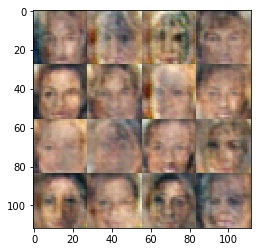

Epoch 0/1... Discriminator Loss: 1.5398... Generator Loss: 0.6137
Epoch 0/1... Discriminator Loss: 3.4620... Generator Loss: 5.8172
Epoch 0/1... Discriminator Loss: 1.2210... Generator Loss: 0.6191
Epoch 0/1... Discriminator Loss: 0.1111... Generator Loss: 3.8540
Epoch 0/1... Discriminator Loss: 0.2565... Generator Loss: 2.2786
Epoch 0/1... Discriminator Loss: 0.3453... Generator Loss: 2.0434
Epoch 0/1... Discriminator Loss: 0.1057... Generator Loss: 3.0571
Epoch 0/1... Discriminator Loss: 0.0324... Generator Loss: 6.8513
Epoch 0/1... Discriminator Loss: 0.0088... Generator Loss: 7.3592
Epoch 0/1... Discriminator Loss: 0.0157... Generator Loss: 4.8833


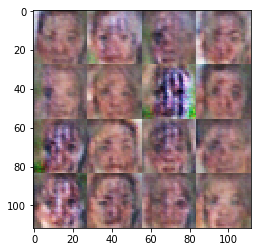

Epoch 0/1... Discriminator Loss: 0.0075... Generator Loss: 7.4391
Epoch 0/1... Discriminator Loss: 0.0065... Generator Loss: 6.7400
Epoch 0/1... Discriminator Loss: 0.0606... Generator Loss: 4.0871
Epoch 0/1... Discriminator Loss: 0.4635... Generator Loss: 1.2886
Epoch 0/1... Discriminator Loss: 0.0045... Generator Loss: 7.1801
Epoch 0/1... Discriminator Loss: 4.0121... Generator Loss: 0.7051
Epoch 0/1... Discriminator Loss: 0.5622... Generator Loss: 1.7697
Epoch 0/1... Discriminator Loss: 0.7187... Generator Loss: 1.4097
Epoch 0/1... Discriminator Loss: 0.5111... Generator Loss: 2.4010
Epoch 0/1... Discriminator Loss: 0.8373... Generator Loss: 0.9571


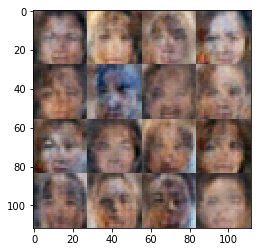

Epoch 0/1... Discriminator Loss: 0.9932... Generator Loss: 1.0202
Epoch 0/1... Discriminator Loss: 2.2074... Generator Loss: 0.1700
Epoch 0/1... Discriminator Loss: 1.4099... Generator Loss: 0.5494
Epoch 0/1... Discriminator Loss: 0.5198... Generator Loss: 2.6943
Epoch 0/1... Discriminator Loss: 0.0841... Generator Loss: 5.3625
Epoch 0/1... Discriminator Loss: 2.9673... Generator Loss: 6.3353
Epoch 0/1... Discriminator Loss: 0.1370... Generator Loss: 4.0747
Epoch 0/1... Discriminator Loss: 1.2483... Generator Loss: 0.5141
Epoch 0/1... Discriminator Loss: 0.6716... Generator Loss: 1.2669
Epoch 0/1... Discriminator Loss: 0.2617... Generator Loss: 2.2792


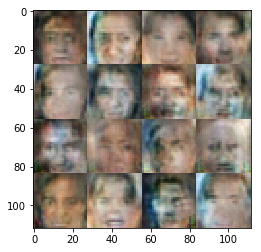

Epoch 0/1... Discriminator Loss: 0.2563... Generator Loss: 2.3834
Epoch 0/1... Discriminator Loss: 0.0724... Generator Loss: 5.4242
Epoch 0/1... Discriminator Loss: 1.2567... Generator Loss: 3.5310
Epoch 0/1... Discriminator Loss: 1.1113... Generator Loss: 2.2267
Epoch 0/1... Discriminator Loss: 1.0586... Generator Loss: 0.7435
Epoch 0/1... Discriminator Loss: 0.8907... Generator Loss: 0.8398
Epoch 0/1... Discriminator Loss: 0.6931... Generator Loss: 2.1990
Epoch 0/1... Discriminator Loss: 0.8018... Generator Loss: 1.5775
Epoch 0/1... Discriminator Loss: 0.6405... Generator Loss: 1.5130
Epoch 0/1... Discriminator Loss: 0.8058... Generator Loss: 1.0855


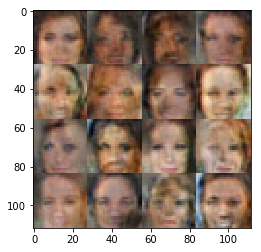

Epoch 0/1... Discriminator Loss: 1.0334... Generator Loss: 2.1747
Epoch 0/1... Discriminator Loss: 1.4926... Generator Loss: 3.8143
Epoch 0/1... Discriminator Loss: 0.8922... Generator Loss: 0.8878
Epoch 0/1... Discriminator Loss: 0.8511... Generator Loss: 1.3036
Epoch 0/1... Discriminator Loss: 1.5090... Generator Loss: 0.3846
Epoch 0/1... Discriminator Loss: 1.1072... Generator Loss: 0.5983
Epoch 0/1... Discriminator Loss: 0.7866... Generator Loss: 0.8775
Epoch 0/1... Discriminator Loss: 0.7278... Generator Loss: 1.7560
Epoch 0/1... Discriminator Loss: 0.7275... Generator Loss: 1.7789
Epoch 0/1... Discriminator Loss: 1.3949... Generator Loss: 0.8559


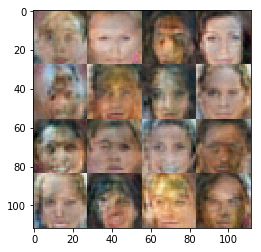

Epoch 0/1... Discriminator Loss: 0.8543... Generator Loss: 1.0329
Epoch 0/1... Discriminator Loss: 0.8831... Generator Loss: 0.9219
Epoch 0/1... Discriminator Loss: 0.8745... Generator Loss: 1.2993
Epoch 0/1... Discriminator Loss: 0.5681... Generator Loss: 1.5395
Epoch 0/1... Discriminator Loss: 0.5247... Generator Loss: 1.8839
Epoch 0/1... Discriminator Loss: 1.5537... Generator Loss: 0.3653
Epoch 0/1... Discriminator Loss: 1.0773... Generator Loss: 2.8211
Epoch 0/1... Discriminator Loss: 0.9849... Generator Loss: 0.9806
Epoch 0/1... Discriminator Loss: 1.1920... Generator Loss: 0.6293
Epoch 0/1... Discriminator Loss: 1.7500... Generator Loss: 0.2814


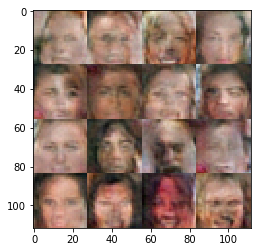

Epoch 0/1... Discriminator Loss: 0.7585... Generator Loss: 1.1699
Epoch 0/1... Discriminator Loss: 0.8968... Generator Loss: 0.8784
Epoch 0/1... Discriminator Loss: 0.8816... Generator Loss: 0.9734
Epoch 0/1... Discriminator Loss: 0.7984... Generator Loss: 2.9488
Epoch 0/1... Discriminator Loss: 1.2634... Generator Loss: 2.9338
Epoch 0/1... Discriminator Loss: 0.9415... Generator Loss: 1.5863
Epoch 0/1... Discriminator Loss: 1.0968... Generator Loss: 2.2110
Epoch 0/1... Discriminator Loss: 1.0764... Generator Loss: 2.5245
Epoch 0/1... Discriminator Loss: 0.8201... Generator Loss: 2.6748
Epoch 0/1... Discriminator Loss: 1.0334... Generator Loss: 0.6139


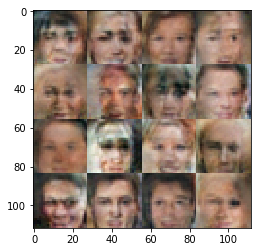

Epoch 0/1... Discriminator Loss: 0.8656... Generator Loss: 0.8437
Epoch 0/1... Discriminator Loss: 0.8288... Generator Loss: 0.8753
Epoch 0/1... Discriminator Loss: 1.8822... Generator Loss: 0.2682
Epoch 0/1... Discriminator Loss: 1.5757... Generator Loss: 0.4137
Epoch 0/1... Discriminator Loss: 0.8539... Generator Loss: 2.0853
Epoch 0/1... Discriminator Loss: 1.1551... Generator Loss: 0.5703
Epoch 0/1... Discriminator Loss: 1.1413... Generator Loss: 0.8024
Epoch 0/1... Discriminator Loss: 0.8003... Generator Loss: 1.6674
Epoch 0/1... Discriminator Loss: 0.6927... Generator Loss: 1.4615
Epoch 0/1... Discriminator Loss: 0.9644... Generator Loss: 0.9707


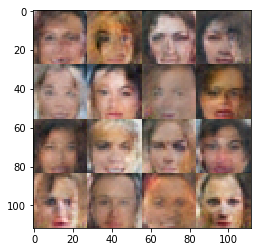

Epoch 0/1... Discriminator Loss: 0.7288... Generator Loss: 1.2178
Epoch 0/1... Discriminator Loss: 0.8237... Generator Loss: 2.7867
Epoch 0/1... Discriminator Loss: 0.9595... Generator Loss: 3.3173
Epoch 0/1... Discriminator Loss: 0.8282... Generator Loss: 0.7906
Epoch 0/1... Discriminator Loss: 1.4500... Generator Loss: 0.4070
Epoch 0/1... Discriminator Loss: 0.6020... Generator Loss: 1.8191
Epoch 0/1... Discriminator Loss: 0.9588... Generator Loss: 0.7416
Epoch 0/1... Discriminator Loss: 1.0685... Generator Loss: 0.7756
Epoch 0/1... Discriminator Loss: 0.9519... Generator Loss: 0.7495
Epoch 0/1... Discriminator Loss: 2.7484... Generator Loss: 0.1765


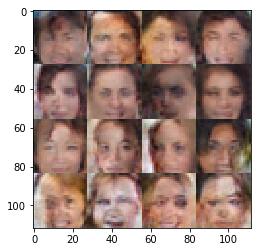

Epoch 0/1... Discriminator Loss: 1.1161... Generator Loss: 0.5952
Epoch 0/1... Discriminator Loss: 1.0087... Generator Loss: 0.7617
Epoch 0/1... Discriminator Loss: 0.9602... Generator Loss: 3.1212
Epoch 0/1... Discriminator Loss: 1.6945... Generator Loss: 0.3274
Epoch 0/1... Discriminator Loss: 0.7869... Generator Loss: 1.2227
Epoch 0/1... Discriminator Loss: 0.5891... Generator Loss: 1.3469
Epoch 0/1... Discriminator Loss: 0.5132... Generator Loss: 1.7906
Epoch 0/1... Discriminator Loss: 0.5464... Generator Loss: 1.9886
Epoch 0/1... Discriminator Loss: 0.7471... Generator Loss: 1.1756
Epoch 0/1... Discriminator Loss: 0.8234... Generator Loss: 0.8587


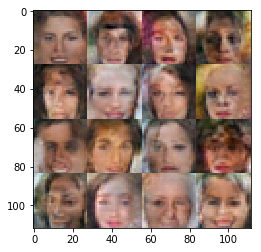

Epoch 0/1... Discriminator Loss: 1.5961... Generator Loss: 0.3000
Epoch 0/1... Discriminator Loss: 0.8850... Generator Loss: 2.1301
Epoch 0/1... Discriminator Loss: 0.6790... Generator Loss: 1.2057
Epoch 0/1... Discriminator Loss: 0.9414... Generator Loss: 1.3112
Epoch 0/1... Discriminator Loss: 1.0060... Generator Loss: 1.0353
Epoch 0/1... Discriminator Loss: 0.6059... Generator Loss: 1.9112
Epoch 0/1... Discriminator Loss: 1.6753... Generator Loss: 0.3062
Epoch 0/1... Discriminator Loss: 1.4219... Generator Loss: 1.2465
Epoch 0/1... Discriminator Loss: 0.8692... Generator Loss: 0.8688
Epoch 0/1... Discriminator Loss: 0.9339... Generator Loss: 0.8637


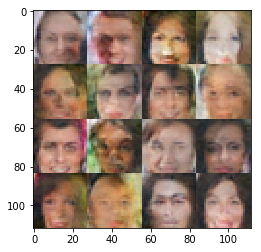

Epoch 0/1... Discriminator Loss: 1.2464... Generator Loss: 0.4956
Epoch 0/1... Discriminator Loss: 1.4924... Generator Loss: 0.4155
Epoch 0/1... Discriminator Loss: 0.9505... Generator Loss: 1.5626
Epoch 0/1... Discriminator Loss: 0.7403... Generator Loss: 1.5415
Epoch 0/1... Discriminator Loss: 0.8858... Generator Loss: 2.4398
Epoch 0/1... Discriminator Loss: 1.1285... Generator Loss: 0.6192
Epoch 0/1... Discriminator Loss: 1.4312... Generator Loss: 0.4053


In [20]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.